In [ ]:
#importing necessary libraries and datafile
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
df = pd.read_csv("housing_price_dataset.csv")

In [ ]:
print(df.head())
print(df.shape)

   SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0        2126         4          1        Rural       1969  215355.283618
1        2459         3          2        Rural       1980  195014.221626
2        1860         2          1       Suburb       1970  306891.012076
3        2294         2          1        Urban       1996  206786.787153
4        2130         5          2       Suburb       2001  272436.239065
(50000, 6)


In [ ]:
#checking for missing values in the dataset
missing_values = df.isnull().sum()

missing_values

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

In [ ]:
#Checking min and max values of prices
min_value = df['Price'].min()

# Calculate the maximum value in the column
max_value = df['Price'].max()

print(min_value)
print(max_value)

-36588.16539749279
492195.2599720151


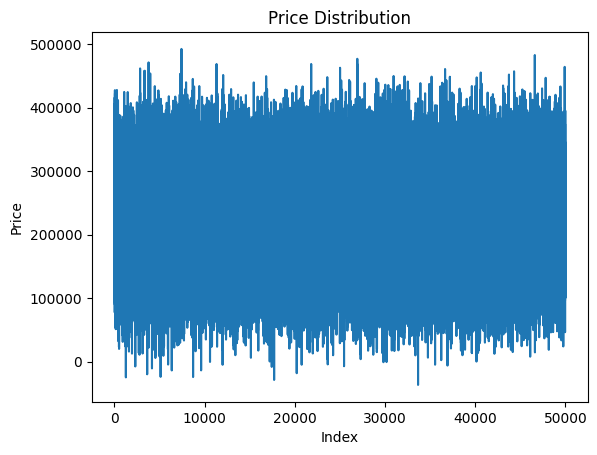

In [ ]:
#Plotting Price column
df['Price'].plot()
plt.xlabel('Index')  # Label for x-axis
plt.ylabel('Price')  # Label for y-axis
plt.title('Price Distribution')  # Title for the plot
plt.show()

In [ ]:
# Count the number of values in the 'Price' column that are less than 0
negative_prices = (df['Price'] < 0).sum()

print(negative_prices)

22


In [ ]:
#Since a house cannot be in the negatives these values will be deleted.
df = df[df['Price'] >= 0]

print(df)

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[49978 rows x 6 columns]


In [ ]:
#Checking all Neighborhood unique values
neighborhood_options = df['Neighborhood'].unique()

print(neighborhood_options)

['Rural' 'Suburb' 'Urban']


In [ ]:
# Calculate the mean price per Neighborhood
neighborhood_mean_price = df.groupby('Neighborhood')['Price'].mean().sort_values()

print(neighborhood_mean_price)

Neighborhood
Suburb    223302.967986
Rural     224209.373282
Urban     227297.857934
Name: Price, dtype: float64


In [ ]:
#Rural is slightly more expensive comparing the mean prices of the neighbourhoods.
#Checking the min and max values per unique value.

neighborhood_min_price = df.groupby('Neighborhood')['Price'].min().sort_values()
neighborhood_max_price = df.groupby('Neighborhood')['Price'].max().sort_values()

print("Minimum price per Neighborhood:")
print(neighborhood_min_price)
print("\nMaximum price per Neighborhood:")
print(neighborhood_max_price)

Minimum price per Neighborhood:
Neighborhood
Suburb     154.779120
Urban     2697.849758
Rural     3000.859614
Name: Price, dtype: float64

Maximum price per Neighborhood:
Neighborhood
Urban     476671.733263
Suburb    482577.163405
Rural     492195.259972
Name: Price, dtype: float64


In [ ]:
# Count the number of houses with prices under $50,000
num_houses_under_50k = (df['Price'] < 50000).sum()

print(num_houses_under_50k)


335


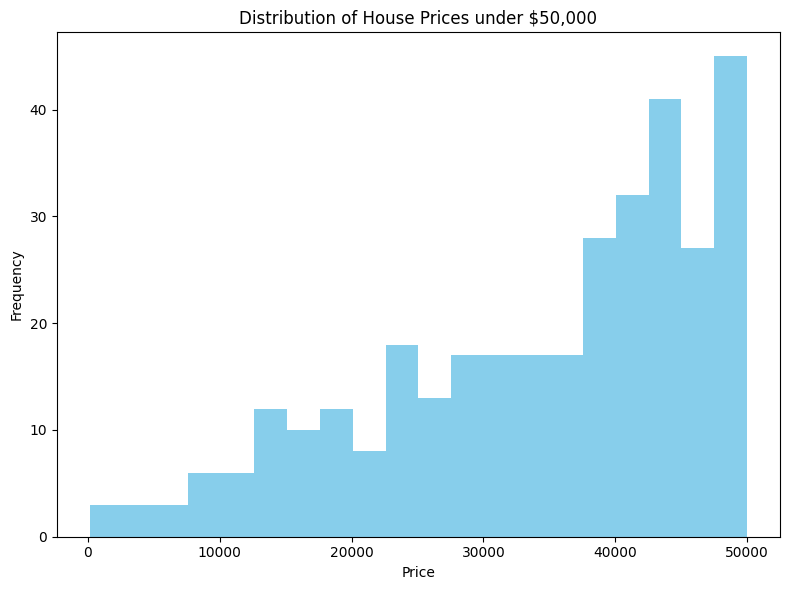

In [ ]:
# Creating a histogram to visualize the distribution of prices under $50,000
houses_under_50k = df[df['Price'] < 50000]

plt.figure(figsize=(8, 6))
plt.hist(houses_under_50k['Price'], bins=20, color='skyblue')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices under $50,000')
plt.tight_layout()
plt.show()

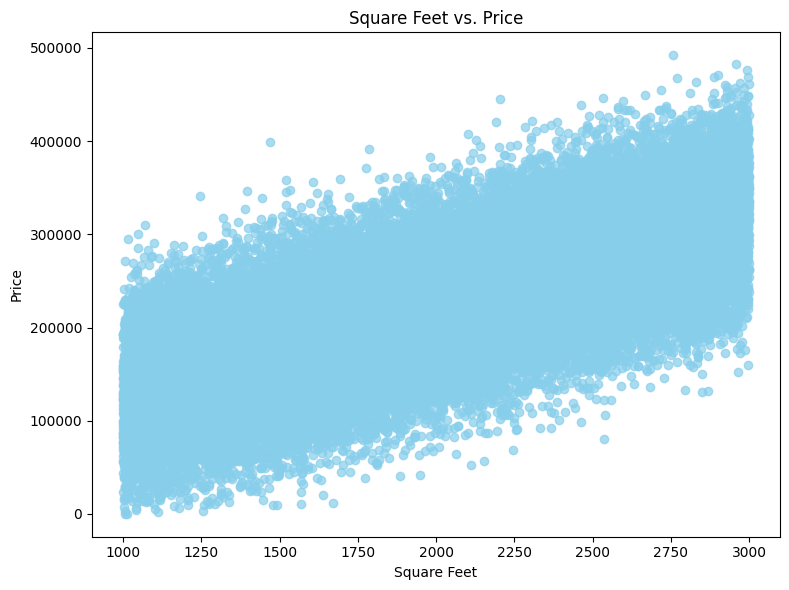

In [ ]:
# Create a scatter plot of SquareFeet vs. Price
plt.figure(figsize=(8, 6))
plt.scatter(df['SquareFeet'], df['Price'], color='skyblue', alpha=0.7)
plt.xlabel('Square Feet')
plt.ylabel('Price')
plt.title('Square Feet vs. Price')
plt.tight_layout()
plt.show()


After analysing a bit of data we will now make a regression model in order to find out which factors influence the price the most.

In [ ]:
df.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
#First we make dummy variables out of the neighborhood variable
# Convert 'Neighborhood' column into dummy variables
dummies_neighborhood = pd.get_dummies(df['Neighborhood'])

# Concatenate the dummy variables with the original DataFrame
df_2 = pd.concat([df, dummies_neighborhood], axis=1)

# Display the updated DataFrame with dummy variables
print(df_2)

       SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price  \
0            2126         4          1        Rural       1969  215355.283618   
1            2459         3          2        Rural       1980  195014.221626   
2            1860         2          1       Suburb       1970  306891.012076   
3            2294         2          1        Urban       1996  206786.787153   
4            2130         5          2       Suburb       2001  272436.239065   
...           ...       ...        ...          ...        ...            ...   
49995        1282         5          3        Rural       1975  100080.865895   
49996        2854         2          2       Suburb       1988  374507.656727   
49997        2979         5          3       Suburb       1962  384110.555590   
49998        2596         5          2        Rural       1984  380512.685957   
49999        1572         5          3        Rural       2011  221618.583218   

       Rural  Suburb  Urban

In [ ]:
#Dropping the original neighborhood and Making sure every variable is numerical for the regression model
df_2.drop('Neighborhood', axis=1, inplace=True)

df_2 = df_2.apply(pd.to_numeric, errors='coerce')

In [ ]:
df_2.head()

,SquareFeet,Bedrooms,Bathrooms,YearBuilt,Price,Rural,Suburb,Urban
0,2126,4,1,1969,215355.283618,1,0,0
1,2459,3,2,1980,195014.221626,1,0,0
2,1860,2,1,1970,306891.012076,0,1,0
3,2294,2,1,1996,206786.787153,0,0,1
4,2130,5,2,2001,272436.239065,0,1,0


In [ ]:
#Making the model
model = sm.ols('Price ~ SquareFeet + Bedrooms + Bathrooms + YearBuilt + Rural + Suburb + Urban', data=df_2).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:44:43   Log-Likelihood:            -6.1149e+05
No. Observations:               49978   AIC:                         1.223e+06
Df Residuals:                   49971   BIC:                         1.223e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.804e+04    1.6e+04      1.124      0.2

In [ ]:
#Checking for outliers using CooksD
CooksD = model.get_influence().cooks_distance

# sample size
n = len(df_2)

#add a variable to the data containing the Cooks D
df_2['Outlier'] = CooksD[0] > 4/n

#Inspect the outliers
df_only_outliers_1 = df_2[df_2.Outlier==True]
df_only_outliers_2 = len(df_only_outliers_1) #checking amount of outliers
print(df_only_outliers_2)

1726


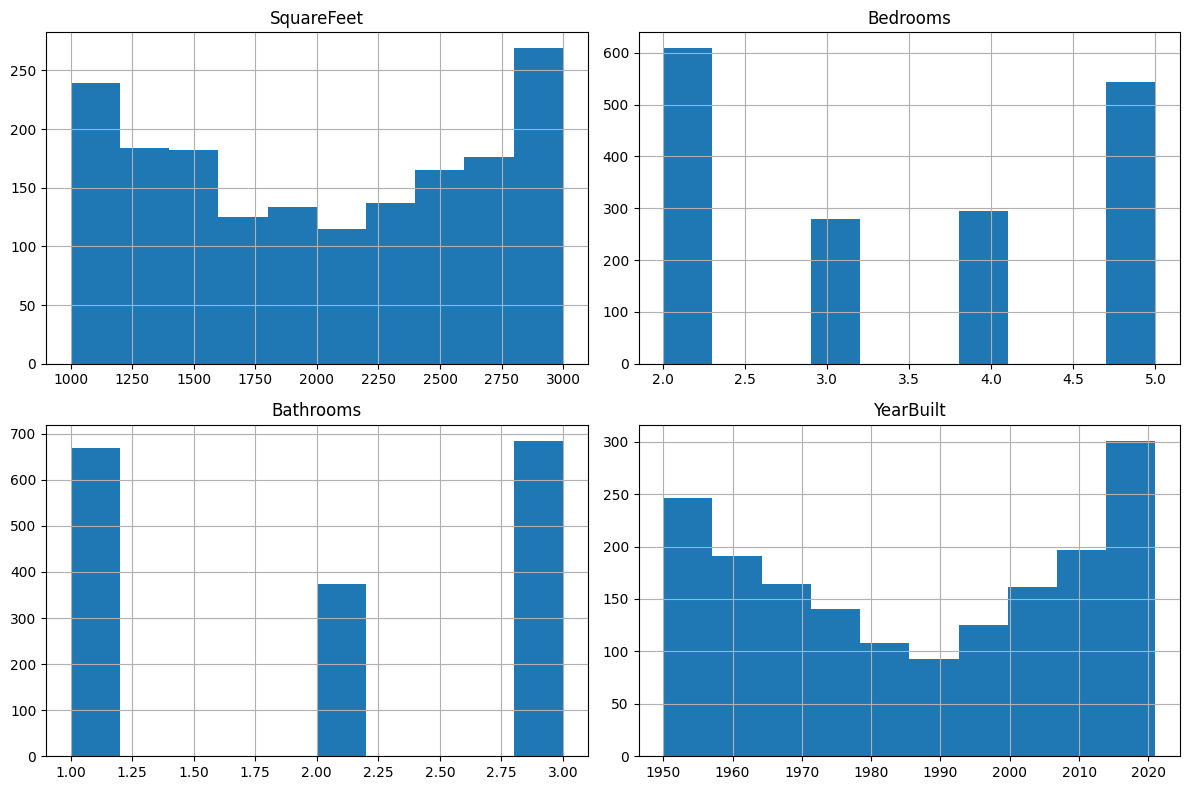

In [ ]:
#CooksD mentions that there are 1726outliers in the data. Before the removal of these outliers it is good to keep in mind that some can be genuine natural variation.
# Plot histograms to check if there are any unusual outliers that are not within a possibility of being natural variation
df_only_outliers_1.hist(column=['SquareFeet','Bedrooms','Bathrooms','YearBuilt'], bins=10, figsize=(12, 8))
plt.tight_layout()
plt.show()

In [ ]:
#Seems that all the potential outliers can be deemed plausible.

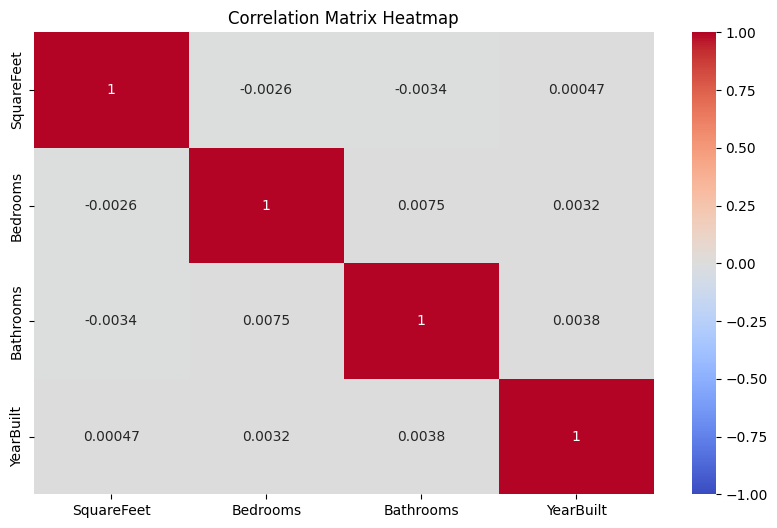

In [ ]:
#Checking for multicollinearity within the continuous variables
#Continuous variables
continuous_cols = ['SquareFeet','Bedrooms','Bathrooms','YearBuilt']
continuous_data = df_2[continuous_cols]

# Calculating correlation matrix
correlation_matrix = continuous_data.corr()

# Plotting heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

In [ ]:
#No multicollinearity with the variables which is good for the model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


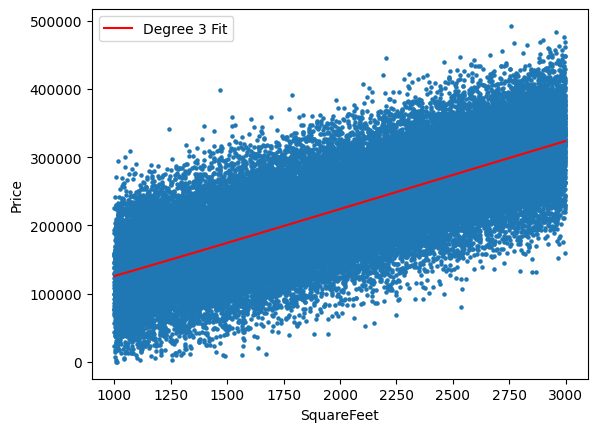

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


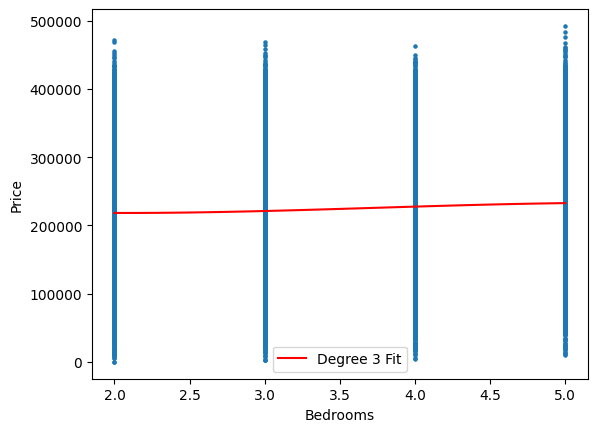

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


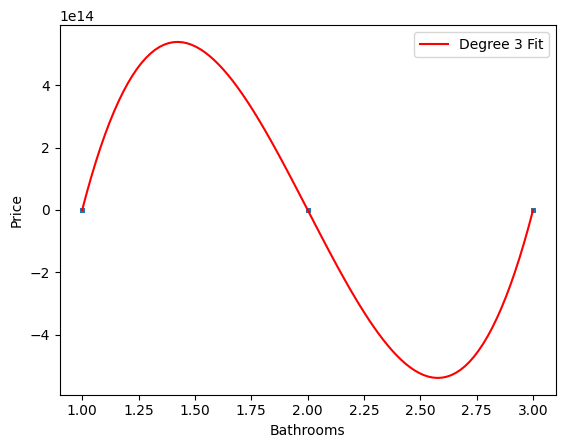

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


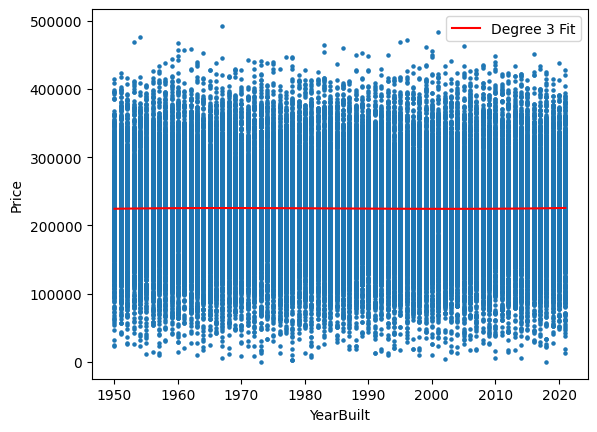

In [ ]:
#Checking for non-lineair regression
# Creating scatterplots for each independent variable vs. the dependent variable
for column in df_2.columns[0:4]:
    plt.scatter(df_2[column], df_2['Price'], s=5)  # Adjust the value of 's' as needed
    plt.xlabel(column)
    plt.ylabel('Price')

    # Fit a polynomial regression model
    degree = 3
    X = df_2[[column]]
    y = df_2['Price']
    polynomial_features = PolynomialFeatures(degree=degree)
    X_poly = polynomial_features.fit_transform(X)
    model = LinearRegression()
    model.fit(X_poly, y)

    # Generate predictions from the model
    x_range = np.linspace(X.min(), X.max(), 100)
    x_range_poly = polynomial_features.transform(x_range.reshape(-1, 1))
    y_pred = model.predict(x_range_poly)

    # Plot the curve
    plt.plot(x_range, y_pred, color='red', label=f'Degree {degree} Fit')
    plt.legend()
    plt.show()

In [ ]:
#No adjustment needed based on the plots. No non lineair regression detected

In [ ]:
#Installing stargazer in order to get the model into a APA notation
!pip install jupyterlab
!pip install stargazer


In [ ]:
model = sm.ols('Price ~ SquareFeet + Bedrooms + Bathrooms + YearBuilt + Rural + Suburb + Urban', data=df_2).fit()


print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                 1.105e+04
Date:                Wed, 13 Dec 2023   Prob (F-statistic):               0.00
Time:                        15:45:43   Log-Likelihood:            -6.1149e+05
No. Observations:               49978   AIC:                         1.223e+06
Df Residuals:                   49971   BIC:                         1.223e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.804e+04    1.6e+04      1.124      0.2

In [ ]:
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

#Using stargazer
Table = Stargazer([model])

HTML(Table.render_html())

In [ ]:
#Since the R2 is not high the likelihood of correct predictions can be assumed to be low, when using this model. Which can be concluded is that the variable bathrooms and bedrooms influence the price the most.